In [1]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
train_data = df.sample(frac=0.7)

In [6]:
train_index = list(train_data.index)

In [7]:
test_data = df.drop(train_index)

In [8]:
test_index = list(test_data.index)

In [9]:
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [10]:
x_test = test_data[features]

In [11]:
y_test = test_data['Outcome']

In [12]:
x_train = train_data[features]
y_train = train_data['Outcome']

#### Entropy Metric

In [13]:
dtree = DecisionTreeClassifier(criterion="entropy",max_depth=1)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

[Text(0.5, 0.75, 'Glucose <= 127.5\nentropy = 0.908\nsamples = 538\nvalue = [364, 174]'),
 Text(0.25, 0.25, 'entropy = 0.656\nsamples = 349\nvalue = [290, 59]'),
 Text(0.75, 0.25, 'entropy = 0.966\nsamples = 189\nvalue = [74, 115]')]

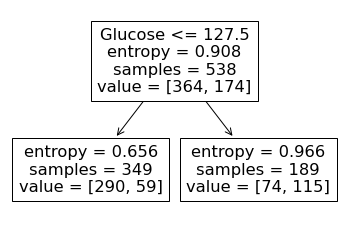

In [14]:
tree.plot_tree(dtree,feature_names=features)

#### Gini Metric

In [15]:
dtree = DecisionTreeClassifier(criterion="gini",max_depth=1)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'Glucose <= 127.5\ngini = 0.438\nsamples = 538\nvalue = [364, 174]'),
 Text(0.25, 0.25, 'gini = 0.281\nsamples = 349\nvalue = [290, 59]'),
 Text(0.75, 0.25, 'gini = 0.476\nsamples = 189\nvalue = [74, 115]')]

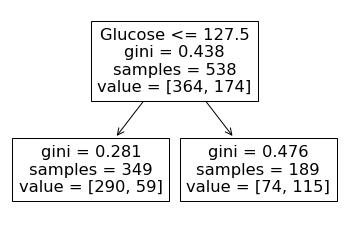

In [16]:
tree.plot_tree(dtree,feature_names=features)